In [4]:
import tensorflow as tf
import numpy as np
import pretty_midi as midi
import os
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import time

In [3]:
TIME_STEPS = 35 
MIDI_PITCH_RANGE = 128

In [6]:
midi_data = []
directory = "data"

for filename in os.listdir(directory):
    midi_data.append(midi.PrettyMIDI(os.path.join(directory, filename)))

In [7]:
comb_rolls = np.zeros((MIDI_PITCH_RANGE, 1))
for elem in midi_data:
    comb_rolls = np.hstack((comb_rolls, elem.get_piano_roll()))


comb_rolls = np.delete(comb_rolls, 0, axis = 1)


In [8]:
prev_sample = 0
next_sample = TIME_STEPS

in_samp = np.zeros((MIDI_PITCH_RANGE, TIME_STEPS, 1))
trgt_samp = np.zeros(MIDI_PITCH_RANGE)

while next_sample < comb_rolls.shape[1]:
    in_samp = np.dstack((in_samp, comb_rolls[:, prev_sample:next_sample]))
    trgt_samp = np.vstack((trgt_samp, comb_rolls[:, next_sample].T))
    prev_sample = next_sample
    next_sample += TIME_STEPS

#
in_samp = np.delete(in_samp, 0, axis=2)
in_samp = np.swapaxes(in_samp, 0, 2)
trgt_samp = np.delete(trgt_samp, 0, axis=0)



In [9]:
print(in_samp.shape,trgt_samp.shape)



(8976, 35, 128) (8976, 128)


In [20]:
input_dim = 128 
output_size = 128 
dropout_rate = 0.03

model = keras.Sequential()
model.add(layers.LSTM(128, input_dim = input_dim, return_sequences=True))
model.add(layers.Dropout(dropout_rate))
model.add(layers.LSTM(128, input_dim = input_dim, return_sequences=True))
model.add(layers.Dropout(dropout_rate))
model.add(layers.LSTM(128, input_dim = input_dim))
model.add(layers.Dense(units = output_size))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(units = output_size))
model.add(layers.Activation('softmax'))
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics = ['accuracy'])




In [21]:
epochs = 500
start_time = time.time()
history = model.fit(x = in_samp, y = trgt_samp, epochs = epochs, validation_split = 0.1, batch_size = in_samp.shape[0])
print("Total training time: ", time.time() - start_time, "seconds")


Epoch 1/500


2022-09-08 12:02:56.517522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-08 12:02:57.346693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-08 12:02:57.500141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-08 12:02:58.099988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-08 12:02:59.017092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-08 12:02:59.589870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-08 12:02:59.765147: I tensorflow/core/grappler/optimizers/cust

1/1 [==============================] - ETA: 0s - loss: 846.9835 - accuracy: 0.0053

2022-09-08 12:03:02.176448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-08 12:03:02.346799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 8s 8s/step - loss: 846.9835 - accuracy: 0.0053 - val_loss: 1052.7426 - val_accuracy: 0.0379
Epoch 2/500


2022-09-08 12:03:02.470154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-08 12:03:02.550536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step - loss: 841.7319 - accuracy: 0.0427 - val_loss: 1040.1106 - val_accuracy: 0.1047
Epoch 3/500
1/1 [==============================] - 6s 6s/step - loss: 836.3354 - accuracy: 0.1104 - val_loss: 1025.6110 - val_accuracy: 0.1837
Epoch 4/500
1/1 [==============================] - 6s 6s/step - loss: 830.3494 - accuracy: 0.1901 - val_loss: 1007.4156 - val_accuracy: 0.2439
Epoch 5/500
1/1 [==============================] - 6s 6s/step - loss: 823.3032 - accuracy: 0.2398 - val_loss: 983.0842 - val_accuracy: 0.2840
Epoch 6/500
1/1 [==============================] - 8s 8s/step - loss: 814.5865 - accuracy: 0.2601 - val_loss: 950.2135 - val_accuracy: 0.2728
Epoch 7/500
1/1 [==============================] - 7s 7s/step - loss: 803.1133 - accuracy: 0.2567 - val_loss: 909.7891 - val_accuracy: 0.2528
Epoch 8/500
1/1 [==============================] - 6s 6s/step - loss: 787.3531 - accuracy: 0.2319 - val_loss: 868.8173 - val_accuracy: 0.1915
Epoch 9/500
1/1

KeyboardInterrupt: 

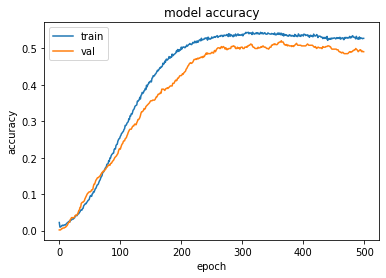

In [136]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

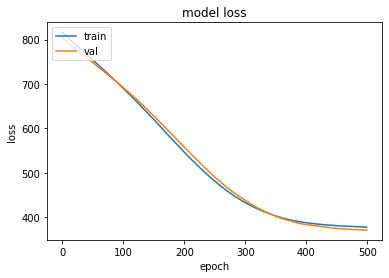

In [137]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()